Take synthetic rho data and attempt outlier detection with one other type of a synthetic lightcurve; sine, flat, box function, inverted rho etc (an obvious outlier).

Sine wave results generated by synthetic_classes.py:

no. clusters:  150 segment length:  10
Mean rho error: 	 7.028353440160581 Max rho error:  12.18987738476214


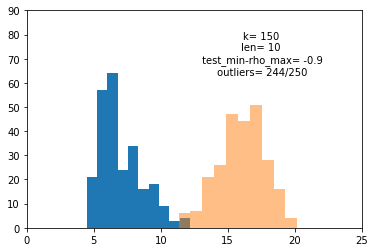

Mean test error: 	 16.04470601521537
Min test-max rho error:  -0.8624787467395763
no. misclassified observations:  6

no. clusters:  150 segment length:  20
Mean rho error: 	 5.655195894712337 Max rho error:  9.009181043701073


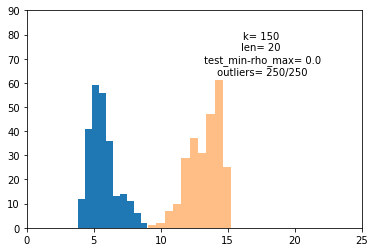

Mean test error: 	 13.281974841311195
Min test-max rho error:  0.031098591606495418
no. misclassified observations:  0

no. clusters:  150 segment length:  30
Mean rho error: 	 5.5273996808344785 Max rho error:  10.620084751515728


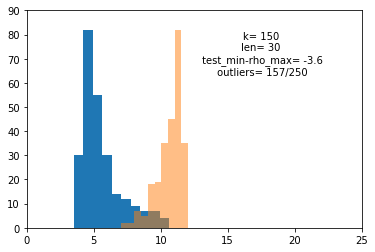

Mean test error: 	 10.686991218968748
Min test-max rho error:  -3.6016276395799167
no. misclassified observations:  93

no. clusters:  150 segment length:  40
Mean rho error: 	 4.733881556654862 Max rho error:  8.86408909756377


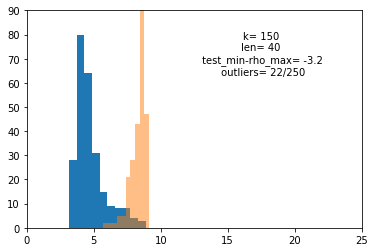

Mean test error: 	 8.321815230461697
Min test-max rho error:  -3.1879934280880553
no. misclassified observations:  228

no. clusters:  200 segment length:  10
Mean rho error: 	 6.85121080170679 Max rho error:  11.838471662657435


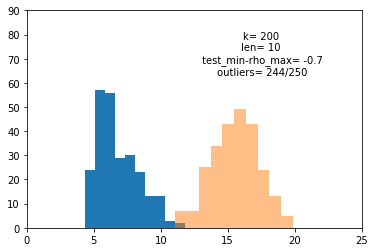

Mean test error: 	 15.567912616700147
Min test-max rho error:  -0.7412395367649669
no. misclassified observations:  6

no. clusters:  200 segment length:  20
Mean rho error: 	 5.478967745720104 Max rho error:  8.826613989681936


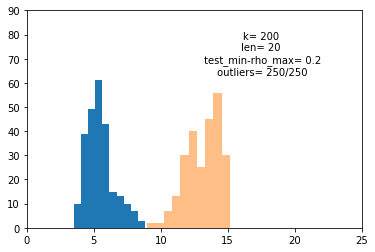

Mean test error: 	 13.157148511433913
Min test-max rho error:  0.1644663286614616
no. misclassified observations:  0

no. clusters:  200 segment length:  30
Mean rho error: 	 5.390229198074933 Max rho error:  10.502048596706032


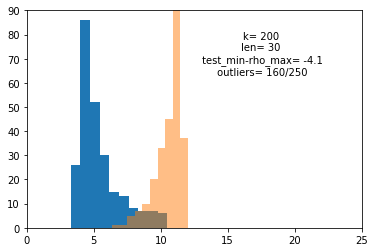

Mean test error: 	 10.60150117997048
Min test-max rho error:  -4.136143640590509
no. misclassified observations:  90

no. clusters:  200 segment length:  40
Mean rho error: 	 4.641015234797135 Max rho error:  8.804572793990337


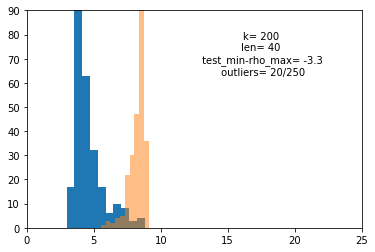

Mean test error: 	 8.25283066089713
Min test-max rho error:  -3.2782585773669526
no. misclassified observations:  230

no. clusters:  250 segment length:  10
Mean rho error: 	 6.692577726378289 Max rho error:  11.520032696681064


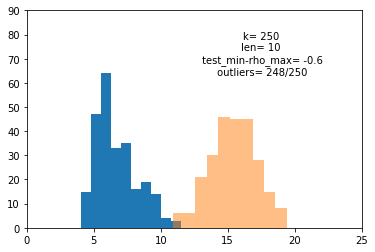

Mean test error: 	 15.432862293174217
Min test-max rho error:  -0.6343100101154011
no. misclassified observations:  2

no. clusters:  250 segment length:  20
Mean rho error: 	 5.355592886068203 Max rho error:  8.748931293679846


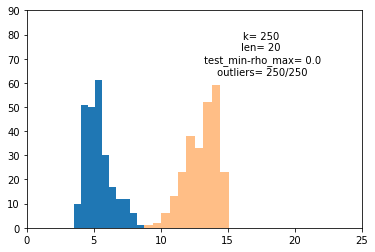

Mean test error: 	 13.061152644502705
Min test-max rho error:  0.021993875486472803
no. misclassified observations:  0

no. clusters:  250 segment length:  30
Mean rho error: 	 5.304088581659271 Max rho error:  10.432817131841038


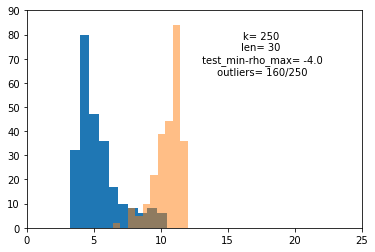

Mean test error: 	 10.539018804075159
Min test-max rho error:  -4.006705752413378
no. misclassified observations:  90

no. clusters:  250 segment length:  40
Mean rho error: 	 4.57179518447995 Max rho error:  8.789727280768595


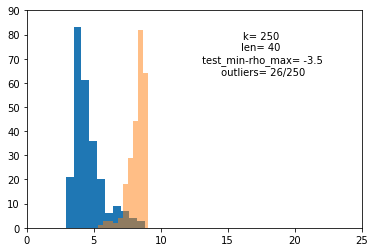

Mean test error: 	 8.239567977292703
Min test-max rho error:  -3.4863154073369786
no. misclassified observations:  224



In [60]:
#sine waves
results=np.loadtxt("valid_results_20190521_inverted.csv", dtype=float, delimiter=",")
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print("no. clusters: ", k_cluster, "segment length: ", seg_len)
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        max_rho=np.max(train[:,-1])
        print("Mean rho error: \t", np.mean(train[:,-1]), "Max rho error: ", max_rho)
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        min_test=np.min(test[:,-1])
        counter=0
        for t in test[:,-1]:
            if t<max_rho:
                counter+=1
        f = plt.figure()
        ax = f.add_subplot(111)
        plt.hist(train[:,-1])
        plt.hist(test[:,-1],alpha=0.5)
        plt.xlim([0,25])
        plt.ylim([0,90])
        plt.text(0.7,0.8,"k= {}\nlen= {}\n test_min-rho_max= {}\n outliers= {}/250".format(k_cluster, seg_len, round(min_test-max_rho,1), 250-counter),
                 ha='center', va='center', transform=ax.transAxes)
        plt.show()
        
        print("Mean test error: \t", np.mean(test[:,-1]))
        print("Min test-max rho error: ", min_test-max_rho)
        print("no. misclassified observations: ", counter)
        
        print()

In [171]:
results=np.loadtxt("results/valid_results_20190510_sine.csv", dtype=float, delimiter=",")
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
worst_rho=[]
best_test=[]
for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        print("no. clusters: ", k_cluster, "segment length: ", seg_len)
        train=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==0)]
        max_rho=train[(train[:,-1]==np.max(train[:,-1]))][0]
        worst_rho.append(max_rho[3])
        #print("Mean rho error: \t", np.mean(train[:,-1]), "Max rho error: ", max_rho)
        test=results[(results[:,0]==k_id) & (results[:,1]==len_id) & (results[:,2]==1)]
        min_test=test[(test[:,-1]==np.min(test[:,-1]))][0]
        best_test.append(min_test[3])

no. clusters:  150 segment length:  10
no. clusters:  150 segment length:  20
no. clusters:  150 segment length:  30
no. clusters:  150 segment length:  40
no. clusters:  200 segment length:  10
no. clusters:  200 segment length:  20
no. clusters:  200 segment length:  30
no. clusters:  200 segment length:  40
no. clusters:  250 segment length:  10
no. clusters:  250 segment length:  20
no. clusters:  250 segment length:  30
no. clusters:  250 segment length:  40


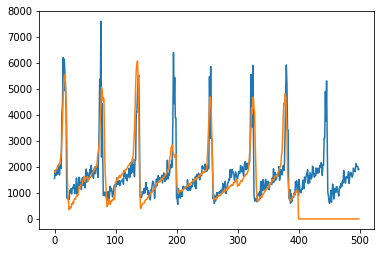

745.4705731821161


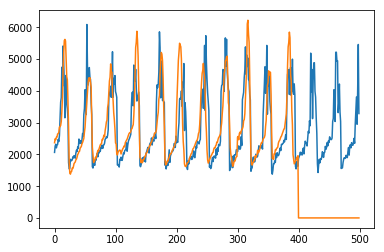

840.0877107211973


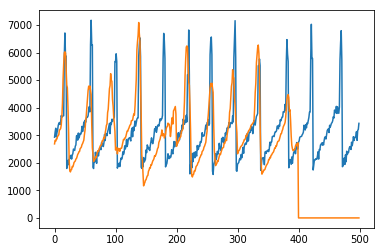

1054.3710758923191


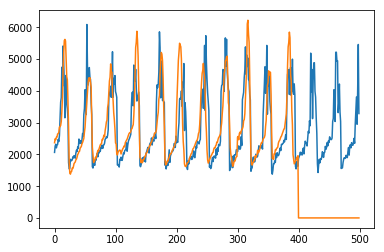

840.0877107211973


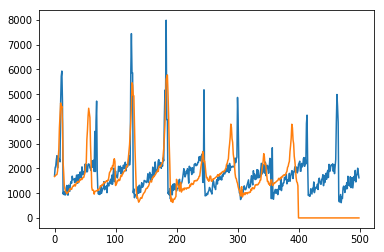

841.8138154039939


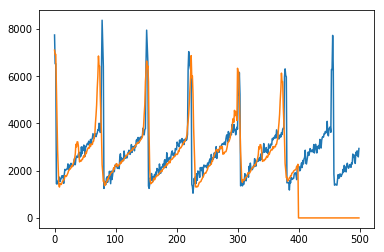

881.155587411444


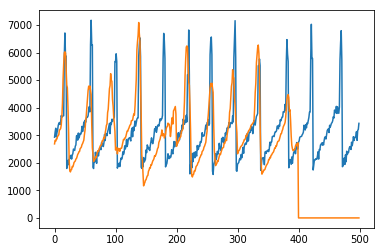

1054.3710758923191


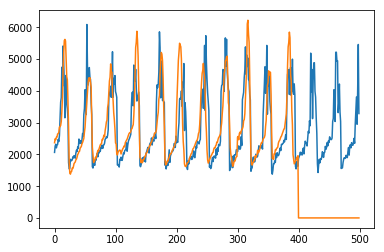

840.0877107211973


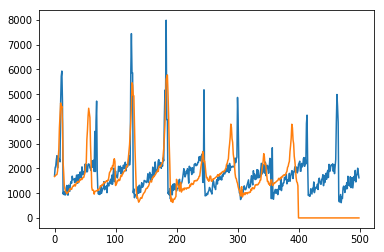

841.8138154039939


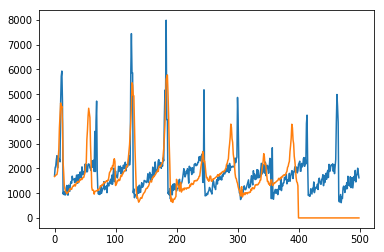

841.8138154039939


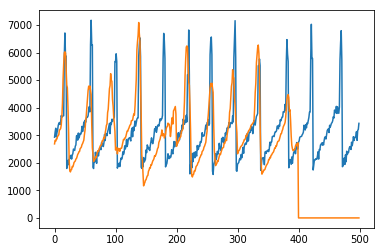

1054.3710758923191


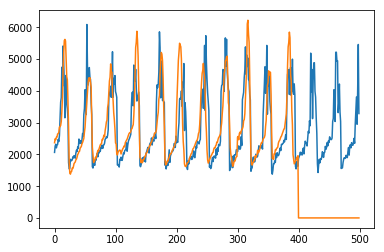

840.0877107211973


In [182]:
for rho in worst_rho:
    rho=rho_valid[int(rho)]
    seg_len=100
    valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
    reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
    error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
    plt.plot(rho)
    plt.plot(reco)
    plt.show()
    print(error)

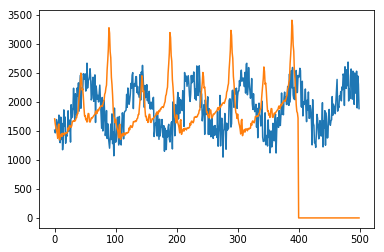

566.6417208537422


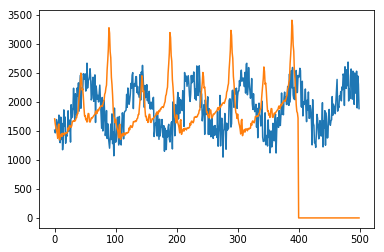

566.6417208537422


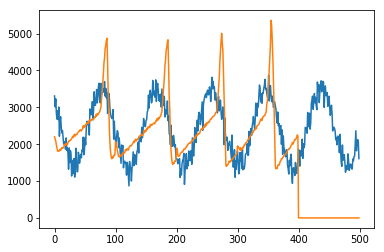

699.682541858134


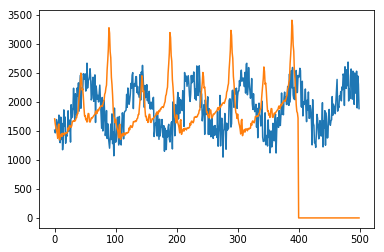

566.6417208537422


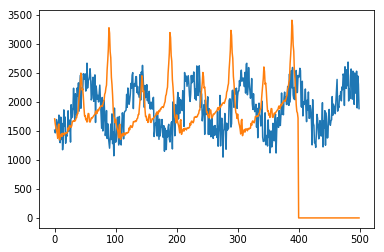

566.6417208537422


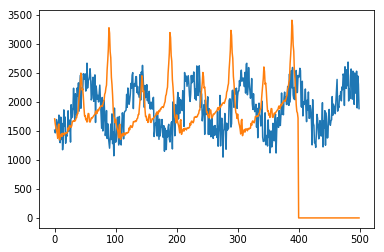

566.6417208537422


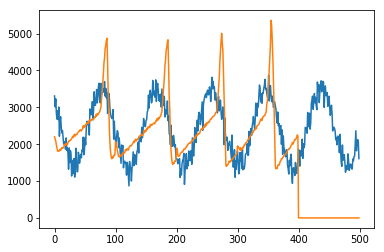

699.682541858134


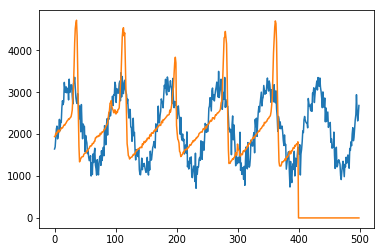

644.4414685920461


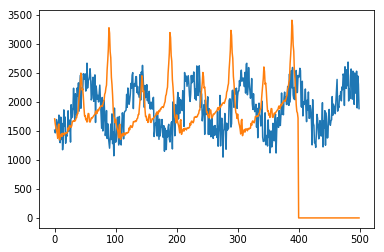

566.6417208537422


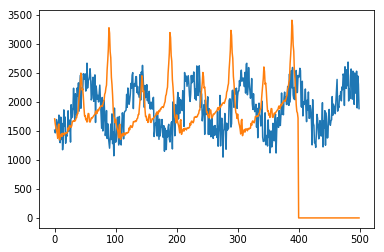

566.6417208537422


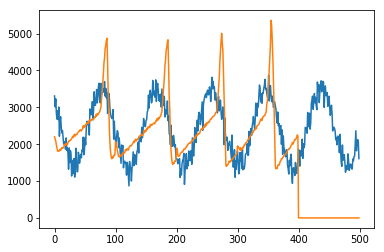

699.682541858134


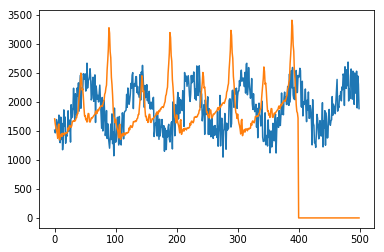

566.6417208537422


In [183]:
for rho in best_test:
    rho=sines[int(rho)]
    seg_len=100
    valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
    reco = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
    error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
    plt.plot(rho)
    plt.plot(reco)
    plt.show()
    print(error)

k_clusters:  [150, 200, 250] 
seg_lens:  [10, 20, 30, 40]


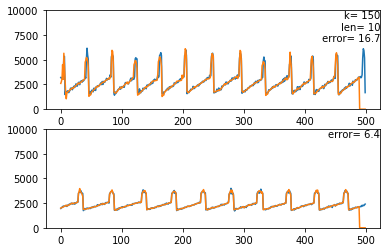

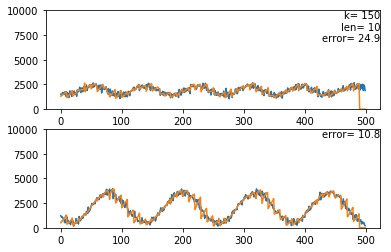

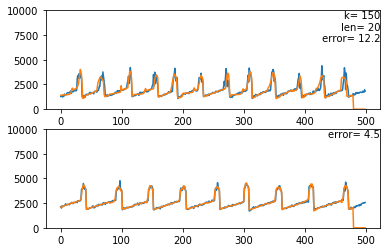

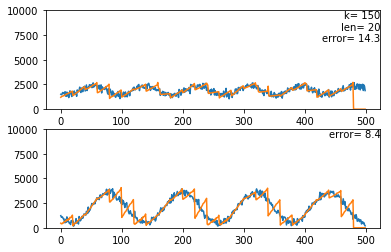

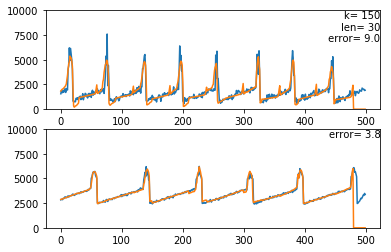

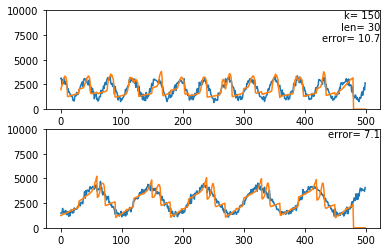

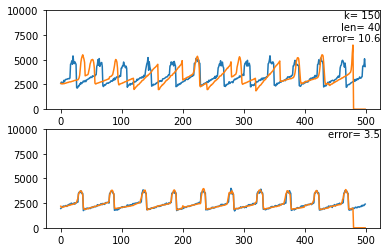

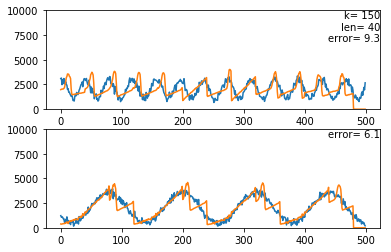

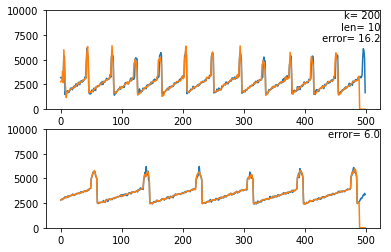

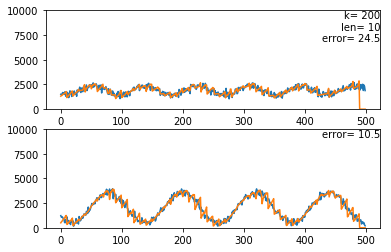

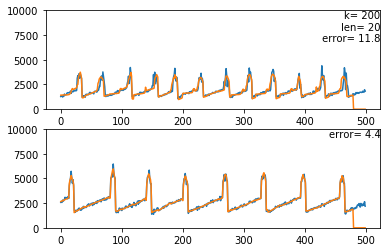

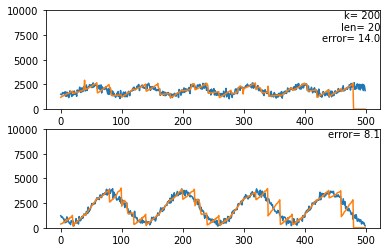

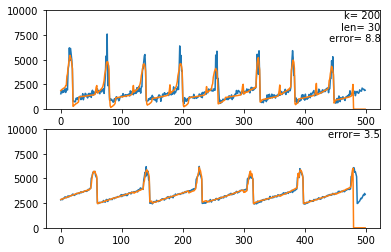

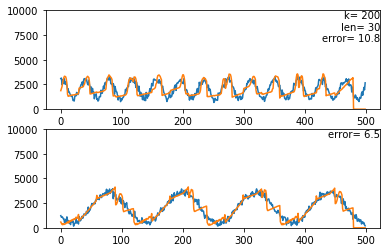

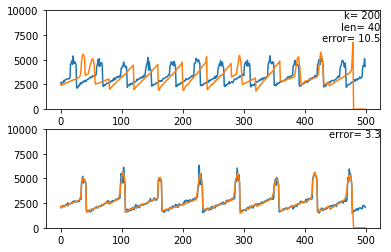

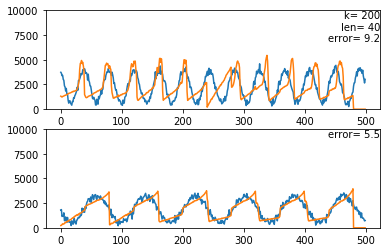

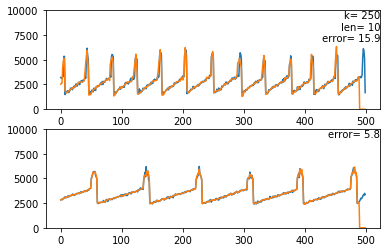

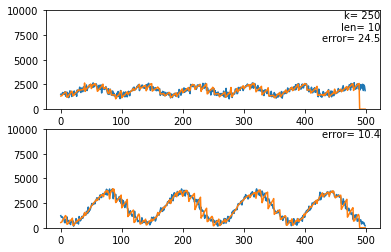

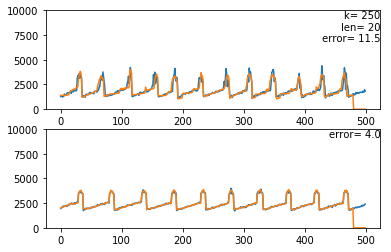

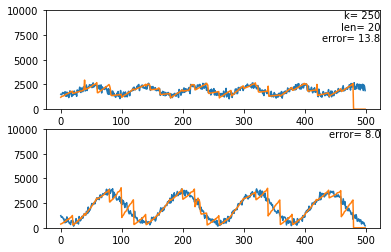

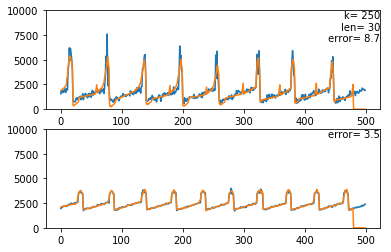

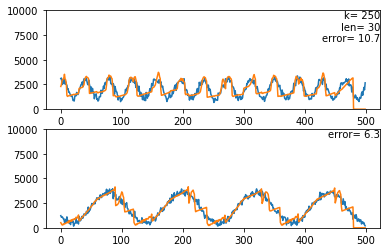

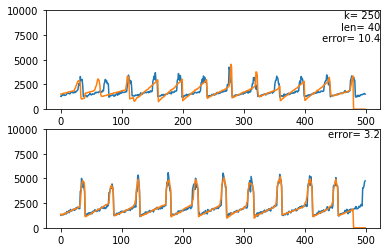

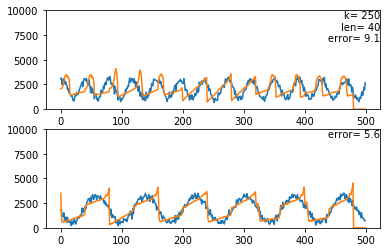

In [58]:
import os
import fnmatch
import csv
import numpy as np
import sys
sys.stdout.flush()
import math

from collections import Counter

from sklearn import tree


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import segment_cluster as sc
import importlib
importlib.reload(sc)


np.random.seed(0)

#"normal" lightcurves
rho_file=np.loadtxt("synthetic_rhos.csv", delimiter=',')
#"outlier" lightcurves
sine_file=np.loadtxt("synthetic_sines.csv", delimiter=',')

rho_train, rho_valid, rho_train_ids, rho_valid_ids= train_test_split(rho_file, list(range(len(rho_file))) ,test_size=0.25)


# inverted_rho=np.copy(rho_valid)
# sine_file=inverted_rho
# for n, in_rho in enumerate(inverted_rho):
#     rho_mean=np.mean(in_rho)
#     inverted_rho[n]-=np.mean(in_rho)
#     inverted_rho[n]*=-1
#     inverted_rho[n]+=abs(np.min(inverted_rho[n])-np.min(rho_valid[n]))




reco_error=[]
#reco_classes=[]
k_clusters=[150, 200, 250]
seg_lens=[10, 20, 30, 40]
print("k_clusters: ", k_clusters, "\nseg_lens: ", seg_lens, flush=True)

for k_id, k_cluster in enumerate(k_clusters):
    for len_id, seg_len in enumerate(seg_lens):
        ##train the model
        #loop throught the light curves of a given class and segments them
        all_train_segments=[]
        for rho in rho_train:
            train_segments=sc.segmentation(rho, seg_len, seg_len, time_stamps=False)
            all_train_segments.append(train_segments)
        all_train_segments=np.vstack(all_train_segments)
        #cluster the segments
        cluster=KMeans(n_clusters=k_cluster, random_state=0)
        cluster.fit(zscore(all_train_segments))

        ### reconstruction of the training class
        for n_rho, rho in enumerate(rho_valid):
            valid_segments= sc.segmentation(rho, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, rho, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((rho[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,0, n_rho, error))
            #print((k_id,len_id,0, n_rho, error), flush=True)
        
        reco_error_ar=np.array(reco_error)
        max_rho=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(max_rho[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, rho_valid[int(max_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(rho_valid[int(max_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\n error= {}".format(k_cluster, seg_len, round(max_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        min_rho=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(rho_valid[int(min_rho[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, rho_valid[int(min_rho[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(rho_valid[int(min_rho[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_rho[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        reco_error=[]

        #reconstruction loop through light curves for every class other than rho              
        for n_sine, sine in enumerate(sine_file):
            valid_segments= sc.segmentation(sine, seg_len, seg_len , time_stamps=False)
            reco, error = sc.reconstruct(valid_segments, sine, cluster, rel_offset=False, seg_slide=seg_len)
            #error=np.sqrt(np.mean((sine[seg_len:-seg_len]-reco[seg_len:-seg_len])**2))
            reco_error.append((k_id,len_id,1,n_sine, error))
            #print((k_id,len_id,1,n_sine, error), flush=True)
            
        reco_error_ar=np.array(reco_error)
        max_test=reco_error_ar[(reco_error_ar[:,-1]==np.max(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(max_test[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, sine_file[int(max_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        f = plt.figure()
        ax = f.add_subplot(211)
        plt.plot(sine_file[int(max_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"k= {}\nlen= {}\nerror= {}".format(k_cluster, seg_len, round(max_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        
        min_test=reco_error_ar[(reco_error_ar[:,-1]==np.min(reco_error_ar[:,-1]))][0]
        valid_segments= sc.segmentation(sine_file[int(min_test[3])], seg_len, seg_len , time_stamps=False)
        reco, error = sc.reconstruct(valid_segments, sine_file[int(min_test[3])], cluster, rel_offset=False, seg_slide=seg_len)
        ax = f.add_subplot(212)
        plt.plot(sine_file[int(min_test[3])])
        plt.plot(reco)
        plt.ylim([0,10000])
        plt.text(1,1,"error= {}".format(round(min_test[-1],1)),
                 ha='right', va='top', transform=ax.transAxes)
        plt.show()
        
        reco_error=[]
        

array([2609.31888505, 2800.928589  , 3107.88325146, 4512.6763519 ,
       3026.86813173, 5660.16561285, 4235.30156251, 3031.19232477,
       1661.54529163, 1053.92005074, 1669.72857733, 1705.9806187 ,
       1777.59600281, 1815.69312072, 1898.53612795, 1954.62967235,
       2011.31836716, 2006.12911796, 2114.821394  , 2142.10837458,
       2094.26708879, 2167.33853763, 2229.12658112, 2288.67370886,
       2339.6190002 , 2398.53006647, 2454.94651297, 2527.14057201,
       2586.39277005, 2646.0445673 , 2560.69617729, 2626.51543661,
       2678.94770452, 2735.59387658, 2782.99346315, 2844.85250609,
       2878.87003922, 2940.92995445, 2983.31210181, 3057.88519379,
       4755.39408263, 4942.76376828, 5227.06185802, 5161.51965005,
       4882.15913885, 4315.55642304, 1303.12201322, 1376.10247489,
       1425.76296506, 1453.21214204, 1702.20298848, 1751.23358705,
       1824.22546816, 1886.90982751, 1943.05725668, 2008.95336404,
       2093.15385084, 2152.20228985, 2204.18060071, 2303.06425

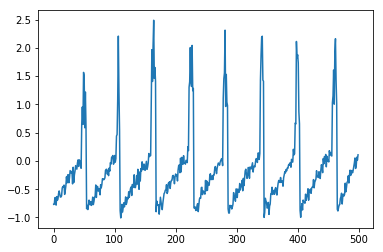

In [52]:
from scipy.stats import zscore
plt.plot(zscore(rho_file)[30])
reco[0]